In [ ]:
!sudo pip install geonamescache

     |████████████████████████████████| 2.6 MB 5.0 MB/s 


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import numpy as np
import geonamescache
import requests
import nltk
from textblob import TextBlob

from nltk.sentiment.vader import SentimentIntensityAnalyzer as si
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pandas as pd
import codecs
import numpy as np
from scipy import stats


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
hp_df = pd.read_csv("https://raw.githubusercontent.com/RumaisaHabib/AO3-dataset/main/hp_fanfics.csv")
indian_df = pd.read_csv("https://raw.githubusercontent.com/RumaisaHabib/AO3-dataset/main/indian_hp_fanfics.csv")
happy_df = pd.read_csv("https://raw.githubusercontent.com/RumaisaHabib/AO3-dataset/main/happy_hp.csv")
sad_df = pd.read_csv("https://raw.githubusercontent.com/RumaisaHabib/AO3-dataset/main/sad_hp.csv")
stopwords = requests.get("https://github.com/RumaisaHabib/AO3-dataset/raw/main/jockers_stopwords.txt").text.split(" ")

In [ ]:
slurs = requests.get("https://github.com/RumaisaHabib/AO3-dataset/raw/main/slurs_1.txt").text.split(" ")
print(slurs)

['mudblood', 'dirtyblood', 'bloodtraitor', 'half-breed', 'mutant', 'squib', 'chee-chee', 'chi-chi', 'ciapaty', 'ciapak', 'coolie', 'curry-muncher', 'curries', 'dink', 'gook', 'gook-eye', 'gooky', 'hajji', 'hadji', 'haji', 'niakoué', 'paki', 'pakkis', 'pancakeface', 'sidewaysvagina', 'pussy', 'slopehead', 'slopey', 'sloper', 'touchofthetarbrush', 'yellowface', 'towelhead', 'tikkamasala', 'cabdriver', 'higger', 'hindunigger', 'appu', 'immigrant', 'terrorist', 'aliens', 'freak', 'sandnigger\n']


In [ ]:
happy_df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,12321999,"Happy Birthday, Harry Potter",['Titti'],Explicit,M/M,Harry Potter - J. K. Rowling,Harry Potter/Severus Snape,NaN,NaN,English,...,2003-05-12,431,1/1,NaN,52,4.0,1158,"['Me_and_my_self', 'IvyKlauth', 'sunnyjulia96'...",[],Title: The familyRated: GWord Count: 100\r\n\r...
1,32931790,Happy Harry Potter Day!,['lorenzobane'],Mature,M/M,Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Hermione Granger, ...","Developing Relationship, Head Auror Harry Pott...",English,...,2021-07-31,2275,1/1,12.0,251,28.0,1584,"['medusa_kat', 'QueenofStrange', 'MiyabiAbeno'...",[],"""Oi, which Harry Potter are you coming dressed..."
2,13588536,"Happy Christmas, Harry Potter",['EspadaIV'],Mature,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Harry Potter, Draco Malfoy/Pansy ...","Harry Potter, Draco Malfoy, Pansy Parkinson","Character Death, Dubious Consent, Bottom!Harry...",English,...,2018-02-06,996,1/1,2.0,63,2.0,2565,"['MamaBear0829', 'fullfukinhomo', 'HelloMushro...",[],"The first time Harry kissed Draco goodbye, he ..."
3,36118297,"Ideal (Happy Birthday, Harry Potter)",['drarrily-we-row-along (fearfully_beautifully...,Teen And Up Audiences,M/M,Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy","Healing, Fluff, rescue dogs, Dealing With Trau...",English,...,2022-01-01,5462,1/1,3.0,152,10.0,1047,"['wooooohooooo', 'unlucky_god', 'BuzzingHuffie...",[],Harry hadn't had very many good birthdays.\r\n...
4,782234,"FIC: Happy Birthday, Harry Potter",['jagnikjen'],Explicit,"Gen, F/M",Harry Potter - J. K. Rowling,Harry Potter/Ginny Weasley,"Harry Potter, Ginny Weasley, Arthur Weasley, M...",NaN,English,...,2013-05-02,3481,1/1,6.0,81,13.0,9413,"['GinaChan1979', 'whathefawkes', 'articcat621'...",[],"\r\nHappy Birthday, Harry Potter\r\n\r\n\r\nHa..."
5,348095,"Professor Snape, Happy Birthday. Harry Potter.",['kinky_kneazle'],Teen And Up Audiences,M/M,Harry Potter - J. K. Rowling,Harry Potter/Severus Snape,"Harry Potter, Severus Snape",Alcohol,English,...,2012-01-26,1239,1/1,9.0,197,15.0,3088,"['TLOTN', 'Steffi_98', 't_h_3_0', 'Thetantaliz...",[],"\r\nProfessor Snape, Happy Birthday.Harry Pott..."
6,765548,Harry Potter and the Happy Holidays,['DakotaSeverus'],Teen And Up Audiences,M/M,Harry Potter - J. K. Rowling,Harry Potter/Severus Snape,"Harry Potter, Severus Snape, Albus Dumbledore,...","Mistletoe, Christmas",English,...,2013-04-18,2564,1/1,2.0,80,6.0,1795,"['24supernova', 'Thetantalizer', 'Endless_Sky6...",[],It was on a brisk morning that Harry Potter fo...
7,35401804,Harry and Teddy's Happy New life (Harry Potter),['Blackseeds'],Explicit,"F/M, Gen, M/M",Harry Potter - J. K. Rowling,NaN,"Teddy Lupin, Harry Potter","Female Harry Potter, POV Teddy Lupin, Alternat...",English,...,2021-11-29,2398,1/1,2.0,71,12.0,8226,"['ArghaDas2695', 'Lvmos_Nox', 'Sayomi_Night', ...",[],Chapter 1 - Sissy harry x Teddy LupinTeddy was...
8,1132582,How Harry Potter Became a Happy Man,['Vaysh'],General Audiences,M/M,Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Luna Lovegood","Animagus, Drabble Sequence",English,...,2014-01-12,808,1/1,3.0,137,11.0,1923,"['Aeri37', 'RedThunderClaw', 'xXshiperXx', 'La...",[],"1.Admittedly, you didn't usually find such sil..."
9,31602944,What Harry Potter Deserves (A Happy Ending),['bluebird8683'],Teen And Up Audiences,"F/F, F/M, Gen, M/M","Harry Potter - J. K. Rowling, Pu nohiroakademi...",Aizawa Shouta | Eraserhead/Yamada Hizashi | Pr...,"Harry Potter, Aizawa Shouta | Eraserhead, Yama...",Married Aizawa Shouta | Eraserhead/Yamada Hiza...,English,...,2021-07-22,9242,7/?,142.0,1116,474.0,22173,"['LadyMal', 'Spade_Z', 'BuffytheMajesticBuffal...",[],\r\n (See the end of the chapter for ...


In [ ]:
hp_df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,21587791,Harry Potter,['hagridsboots'],Explicit,Other,Original Work,NaN,NaN,NaN,English,...,2019-11-29,354,4/4,1.0,39.0,NaN,4633,"['SallySwan', 'ema527', 'Princess_justice1229'...",[],"\r\n\r\n\r\n\r\n\r\n\r\n\r\nBorn: July 30, 198..."
1,30527505,Harry Potter,['White_Stone'],Mature,Multi,Harry Potter - J. K. Rowling,"Harry Potter/Tom Riddle | Voldemort, Hermione ...","Harry Potter, Tom Riddle | Voldemort, Hermione...","Master/Slave, Slave Tom Riddle, Master Harry P...",English,...,2021-11-22,4276,6/?,24.0,427.0,81.0,8793,"['Imperion', 'LunaLuthor', 'grimmpotterfan', '...",[],"Harry groaned as he sat up, his spine cracking..."
2,7541962,Harry Potter,['moderatemalfoy (jenism)'],Teen And Up Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Original Female Character(s), Dra...","Harry Potter, Draco Malfoy, Seamus Finnigan, D...","Rape/Non-con Elements, Implied/Referenced Rape...",English,...,2016-07-20,10690,13/13,15.0,189.0,12.0,9446,"['luv_jwisungiee', 'chewingthegummysmile', 'mm...",[],I was walking through the courtyard only to se...
3,24609490,Harry Potter,['rubymarella302'],Teen And Up Audiences,"Gen, M/M",Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Various Characters...",NaN,English,...,2020-06-08,3732,2/2,NaN,73.0,3.0,2642,"['Togaishere', 'lovingch8ya', 'Shinycl0ud', 'R...",[],So it's gotta be Drarry. Harry and Draco are t...
4,13871511,Harry Potter meets Harry Potter,['CaelynAilene'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Draco Malfoy, Ron Weasley, Hermi...",NaN,English,...,2018-03-09,6762,6/6,140.0,1654.0,129.0,32817,"['Gravity_Cavity736', 'Aee_e', 'Wolfmomdiangel...",[],"November 2007\r\n\r\n""Harry! Harry!"" Ron bega..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28789779,Harry Potter Various Oneshots,['matters17793'],General Audiences,M/M,Harry Potter - J. K. Rowling,"Harry Potter/Oliver Wood, Draco Malfoy/Harry P...","Harry Potter, Oliver Wood, Hermione Granger, R...","Coming Out, Friendship, Friends to Lovers, Gay...",English,...,2021-01-24,2814,4/4,2.0,42.0,1.0,2141,"['altray3456', 'Luchan27', 'idontknowgay', 'ac...",[],"Harry has been sad since leaving Hogwarts, as ..."
196,23339794,Harry Potter One Shots,['Aninvisiblekat'],Not Rated,NaN,"Harry Potter - J. K. Rowling, Harry Potter and...","George Weasley/Reader, Remus Lupin/Reader, Nev...","George Weasley, Fred Weasley, Scorpius Malfoy,...","Reader-Insert, One Shot Collection",English,...,2020-12-18,34844,19/?,5.0,228.0,15.0,8360,"['moonyluvchoclate', 'steph166', 'Kenzela', 'B...",[],I suppose that by the winter of third year I s...
197,20908829,Harry Potter Next Generation,['QueenPandora666'],Teen And Up Audiences,Multi,Harry Potter - J. K. Rowling,"Teddy Lupin/Original Character(s), Scorpius Ma...","Original Female Character(s), Original Male Ch...","Teen Romance, Teen Angst, Slice of Life",English,...,2019-10-05,1955,2/?,NaN,4.0,NaN,315,"['Dobby_is_free', 'HobbitKumori']",[],First of all I'm going to say this is my and m...
198,24606949,harry potter fan club,['orphan_account'],Teen And Up Audiences,"F/F, F/M, M/M",Harry Potter - J. K. Rowling,"Hermione Granger/Ron Weasley, Seamus Finnigan/...","Harry Potter, Hermione Granger, Ron Weasley, S...","Group chat, Crack, Alternate Universe - Muggle...",English,...,2021-01-06,6070,5/5,39.0,273.0,31.0,2764,"['Neurodivergent_Bibliophile', 'Princesscharlo...",[],ron texts like it's 2011 and he's updating his...


In [ ]:
indian_df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,27351166,Could Harry Potter Be Indian?,['DeutschesMaedchen'],General Audiences,Gen,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Fleamont Potter, James Potter, L...","article, Discussion, Indian Harry Potter?, Hea...",English,...,2020-11-02,994,1/1,22.0,12.0,NaN,456,"['LookOutYourWindow', 'Aspen_Gray', 'Mibami17'...",[],"\r\nThese days I see a theory or, rather, a he..."
1,11057790,serendipity,['sempreme'],General Audiences,M/M,Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy","HP: EWE, Post-Hogwarts, Established Relationsh...",English,...,2017-05-31,463,1/1,20.0,351.0,30.0,4514,"['Isabel_Lynden', 'MindyLou', 'exprwesso', 'Ag...",[],\r\nThe house was full with a delicious smell ...
2,37847989,Potter in Metaverse,['BrownEyedCat'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Ron Weasley, Severus Snape","Sassy Harry Potter, Harry Potter Epilogue What...",English,...,2022-03-20,379,1/1,NaN,2.0,NaN,130,"['Isy2104', 'hydroserries']",[],Harry was holding his wand steady ready to def...
3,13706415,hoping to do some good in the world,['aletterinthenameofsanity'],General Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Hermione Granger/Viktor Krum, Minor or Backgro...","Hermione Granger, Harry Potter, Anthony Goldst...","Muslim Character, Indian Character, Black Harr...",English,...,2018-02-16,1331,1/1,86.0,1719.0,353.0,12035,"['ForestKat', 'mockingbird182003', 'marvelvibe...",[],\r\nWhen a little muggleborn girl walks up to ...
4,17305022,after the storm,['aheartcalledhome'],General Audiences,Gen,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"Lily Evans Potter, James Potter, Harry Potter","First War with Voldemort, Fluff, Family Fluff,...",English,...,2019-01-05,2785,1/1,6.0,90.0,10.0,1485,"['AliceCasch', 'Melbjily', 'House_Of_Marcella'...",[],The stairs stand between James and Lily like a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15920604,Happier,['rewmariewrites'],Teen And Up Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Harry Potter, Neville Longbottom ...","Neville Longbottom, Draco Malfoy, Harry Potter...","Past Neville Longbottom/Draco Malfoy, POV Nevi...",English,...,2018-09-07,2036,1/1,5.0,118.0,17.0,2198,"['orangedice', 'Taiiiiiiss', 'HobiHouse', 'And...",[],\r\n Neville was waiting for Ginny on the...
196,32606248,I Second That Emotion,['iverysloth'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Petunia Evans...","Getting Together, First Kiss, Plus Size Lily E...",English,...,2021-07-16,1522,1/1,6.0,115.0,6.0,1310,"['keadiffero', 'Blonde333', 'ThatRandomQueer1d...",[],James Potter is the worst. \r\n\r\n \r\n\r\nHe...
197,27746581,Children,['UnnamedElement (Unnamed_Element)'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Ron Weasley, Harry Potter/Gin...","Harry Potter, Ron Weasley, Hermione Granger, T...","Children, The trio grows up, Indian food, Preg...",English,...,2020-11-27,4973,1/1,6.0,49.0,6.0,1040,"['flowerunfair', 'Paus24', 'MelodramaticDramaQ...",[],\r\nCHILDREN\r\n\r\n\r\n\r\nJanuary 2004\r\nBr...
198,26181046,The Boy Who Lived: The Beginning,['The_Fang_Kid'],Teen And Up Audiences,"M/M, Multi",Harry Potter - J. K. Rowling,NaN,"Harry Potter, Draco Malfoy, Hermione Granger, ...","Bisexual Harry, Alive Regulus, Alternate Unive...",English,...,2020-09-21,3612,4/4,2.0,29.0,2.0,735,"['Amelona7904', 'Lonlydolphin', 'Darkstarnight...",[],"PROLOGUE \r\nOn Privet Drive, they expected no..."


In [ ]:
# !pip install nltk
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download("stopwords")
# from ntlk.corpus import stopwords

# stop_words = ntlk.corpus.stopwords.words("english")
print(stopwords)

['0', '', '1', '', '2', '', '3', '', '4', '', '5', '', '6', '', '7', '', '8', '', '9', '', 'a', '', 'aaron', '', 'abbey', '', 'abbie', '', 'abdul', '', 'abe', '', 'across', '', 'abel', '', 'abigail', '', 'about', '', 'above', '', 'abraham', '', 'abram', '', 'abst', '', 'accordance', '', 'according', '', 'act', '', 'actually', '', 'ada', '', 'adah', '', 'adalberto', '', 'adaline', '', 'adam', '', 'adan', '', 'added', '', 'among', '', 'addie', '', 'adela', '', 'adelaida', '', 'adelaide', '', 'adele', '', 'adelia', '', 'adelina', '', 'adeline', '', 'adell', '', 'adella', '', 'adelle', '', 'adena', '', 'adina', '', 'adj', '', 'adolfo', '', 'adolph', '', 'adopted', '', 'adria', '', 'adrian', '', 'adriana', '', 'adriane', '', 'adrianna', '', 'adrien', '', 'adrienne', '', 'after', '', 'afterwards', '', 'afton', '', 'again', '', 'against', '', 'agatha', '', 'agnes', '', 'agnus', '', 'agueda', '', 'agustina', '', 'ahmad', '', 'ahmed', '', 'ai', '', 'aida', '', 'besides', '', 'aide', '', 'aiko',

In [ ]:
#stop_words = nltk.corpus.stopwords.words("english")
# text_file = open("C:\\Users\\maira\Desktop\\DATA_LESSON_5\\jockers_stopwords.txt", "r", encoding="utf8")


def stopwordsRemoval(body):
  new_body = [word for word in simple_preprocess(str(body)) if word not in stopwords]
  # print(new_body)
  return new_body


In [ ]:
for index,row in hp_df.iterrows():
  hp_df.loc[index, "body"] = " ".join(stopwordsRemoval(row["body"]))

for index,row in indian_df.iterrows():
  indian_df.loc[index, "body"] = " ".join(stopwordsRemoval(row["body"]))

In [ ]:
for index,row in happy_df.iterrows():
  happy_df.loc[index, "body"] = " ".join(stopwordsRemoval(row["body"]))

In [ ]:
for index,row in sad_df.iterrows():
  sad_df.loc[index, "body"] = " ".join(stopwordsRemoval(row["body"]))

## Sentiment

In [ ]:
nltk.download('vader_lexicon')
happy_polarity = []
sa_happy = si()




for index, row in happy_df.iterrows():
  t = row["body"]
  # print(t)
  blob = TextBlob(t)
  happy_polarity.append(blob.sentiment.polarity)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sad_polarity = []
sa_sad = si()

for index, row in sad_df.iterrows():
  t = row["body"]
  blob = TextBlob(t)
  sad_polarity.append(blob.sentiment.polarity)

In [ ]:
nltk.download('vader_lexicon')
indian_polarity = []
hp_polarity = []
# sa_in = si()
# sa = si()
for index, row in indian_df.iterrows():
  t = row["body"]
  blob = TextBlob(t)
  indian_polarity.append(blob.sentiment.polarity)

for index, row in hp_df.iterrows():
  t = row["body"]
  blob = TextBlob(t)
  hp_polarity.append(blob.sentiment.polarity)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
pd.DataFrame(indian_polarity)


,0
0,0.069959
1,0.256481
2,0.138693
3,0.149623
4,0.039306
...,...
195,0.133580
196,0.139146
197,0.076548
198,-0.047338


In [ ]:
pd.DataFrame(hp_polarity)

,0
0,0.067540
1,0.106408
2,-0.071894
3,0.092270
4,0.031710
...,...
195,0.070942
196,0.039380
197,-0.006453
198,-0.043039


In [ ]:
from matplotlib import pyplot as plt

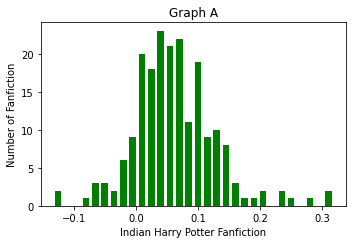

In [ ]:
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

pd.DataFrame(indian_polarity).plot(ax=ax, kind="hist", bins=30, legend=None, rwidth=0.7, color="green")
plt.xlabel('Indian Harry Potter Fanfiction')
plt.ylabel('Number of Fanfiction')
plt.title("Graph A")
plt.show()

# p value, confidence interval

# Y axis is the number of fanfiction, X axis is the indian polarity
# the negative values on the X axis are of those fanfics which have a sad tone, the positive values are of those fanfics which have a happy tone
# so in this case the sad tone fanfics are less in number
# Please label X axis Indian Harry Potter Fanfiction
# Can you please label this graph Figure A
# Is it possible to make a key on the graph that shows that negative values = sad tone, postive values = happy tone

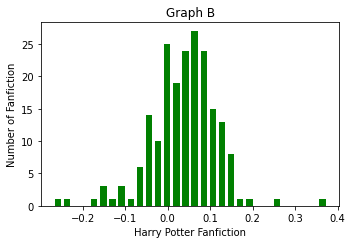

In [ ]:

plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

pd.DataFrame(hp_polarity).plot(ax=ax, kind="hist", bins=30, rwidth=0.7, legend=None, color="green")
plt.xlabel('Harry Potter Fanfiction')
plt.ylabel('Number of Fanfiction')
plt.title("Graph B")
plt.show()

# Y axis is the number of fanfiction, X axis is the hp polarity
# the negative values on the X axis are of those fanfics which have a sad tone, the positive values are of those fanfics which have a happy tone
# in this case the happy tone fanfics are less in number
# Please label X axis Harry Potter Fanfiction
# Can you please label this graph Figure B
# Is it possible to make a key on the graph that shows that negative values = sad tone, postive values = happy tone

In [ ]:
stats.ttest_ind(hp_polarity, indian_polarity).pvalue

# less than  10%

0.0012291719972686121

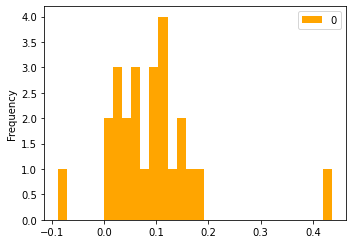

In [ ]:


pd.DataFrame(happy_polarity).plot(kind="hist", bins=30, color="orange")


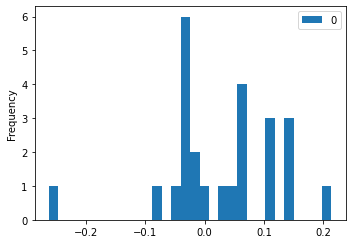

In [ ]:
pd.DataFrame(sad_polarity).plot(kind="hist", bins=30)

In [ ]:
sad_df.loc[0,"body"]

'freds dead survivors guilt isn twin anymore orphan mommy daddy died battle parvati lost friend loyal companion years died battle little boy camera died courage andromeda lost family tonks bellatrix trio came scars scars lost brother lost childhood lost girlfriend call fought people battle lose lost mind childhood sure brightest witch age call knowledge things seen whispers heard ignorance bliss times wished knew boy lived twice war took uncle moony uncle padfoot happy war pain immense watched friends suffer took mere teenager wished dead wouldn kids grow fast seventeen parents weasley fair regulus afterlife saw grieve watched brother blame watched move kid find slowly move stuck feel feel heart breaking pieces cutting stomach feel gasping air getting feel wanting scream power feel wishing death watching soulmate need anymore happy happy life lived die reunited life chose fair personally broke heart hold tight bellatrix lestrange name haunt dreams name reminder lost nearly lost happy c

In [ ]:
happy_df.loc[1,"body"]

'oi coming dressed party thinking triwizard fan grunge hair thankful door office puts desk scream despair office getting ready annual day party held officially ministry fucking magic year theme apparently dress various eras truly means sincerely doesn hell supposed mean shah thinking post war travel shah says really liked unironic hawaiian shirts finally couldn take anymore opened door office suddenly glaring aurors consider dressing aurors jobs sir shah squeaked hand hair normally hardass boss known office huge softy enjoys mentoring aurors starting careers door open talk deal hard terrible human beings wants employees happy goddamn wants work life balance wants jokes office fucking day doesn want yelling babies solicitor says saunters bullpen please favor shutting replies worked closely hundreds cases point ago ceased real hostility semi regular semi casual sex doesn hurt course doesn shut thinking auror outfit wore uniform look fetching red replies dryly wrinkles nose alas drawing b

## Genre

In [ ]:
X = hp_df["body"].copy()
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(X)
tf_feature_names = tf_vectorizer.get_feature_names()

X_in = indian_df["body"].copy()
tf_vectorizer_in = CountVectorizer()
tf_in = tf_vectorizer_in.fit_transform(X_in)
tf_feature_names_in = tf_vectorizer_in.get_feature_names()

X_c = hp_df["body"].append(indian_df["body"] )
tf_vectorizer_c = CountVectorizer()
tf_c= tf_vectorizer_c.fit_transform(X_c)
tf_feature_names_c = tf_vectorizer_c.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf

<200x28245 sparse matrix of type '<class 'numpy.int64'>'
	with 197472 stored elements in Compressed Sparse Row format>

In [ ]:
tf_in

<200x30847 sparse matrix of type '<class 'numpy.int64'>'
	with 258786 stored elements in Compressed Sparse Row format>

In [ ]:
tf_c

<400x39504 sparse matrix of type '<class 'numpy.int64'>'
	with 456258 stored elements in Compressed Sparse Row format>

In [ ]:
topic_num = 20
lda = LatentDirichletAllocation(topic_num, max_iter=50, # first parameter # OF TOPICS, YOU DECIDE
                                learning_method='online', learning_offset=50.,random_state=0).fit(tf)

lda_in = LatentDirichletAllocation(topic_num, max_iter=50, # first parameter # OF TOPICS, YOU DECIDE
                                learning_method='online', learning_offset=50.,random_state=0).fit(tf_in)

lda_c = LatentDirichletAllocation(topic_num, max_iter=50, # first parameter # OF TOPICS, YOU DECIDE
                                learning_method='online', learning_offset=50.,random_state=0).fit(tf_c)

In [ ]:
lda_W = lda.transform(tf)
lda_H = lda.components_


lda_W_in = lda_in.transform(tf_in)
lda_H_in = lda_in.components_

lda_W_c = lda_c.transform(tf_c)
lda_H_c = lda_c.components_

In [ ]:
lda_H_in.shape

(20, 30847)

In [ ]:
lda_H.shape

(20, 28245)

In [ ]:
def display_topics(H, W, feature_names, documents, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(H):
        ("Topic %d:" % (topic_idx))
        topics.append((("Topic %d:" % (topic_idx)), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))

    return topics

no_top_words = 150 # this is arbitrary decided by the USER, YOU DECIDE

topics = display_topics(lda_H_c, lda_W_c, tf_feature_names_c, X_c, no_top_words)
topics

[('Topic 0:',
  'blood weasley clan wizard witch status pure house sisters brothers hogwarts birthday age parents name gryffindor black slytherin half lovegood longbuttom malfroy griffel xenofilus vlobult evers drualla hendrika fem leendert slyhterin cygnus merope aka abraxas didn hermione looked eyes time face look right room head severus going away want hand little remus turned voice really couldn sat wanted people took year hands magic fleur felt death wand door take saw front boy granger dark looking hair need knew small wasn mind started bit came body girl talk sure friends find finally feel mother stood professor family years began making smile pulled mean father heard tried end keep nodded night sorry course idea world quite breath lips arm narcissa friend doesn bed happened things place trying please hall old day smiled close continued help able table quickly feeling yeah okay gave open victoire called standing slowly wouldn hadn side neck second'),
 ('Topic 1:',
  'time hermio

In [ ]:
topics = display_topics(lda_H_in, lda_W_in, tf_feature_names_in, X_in, no_top_words)
topics

[('Topic 0:',
  'says lizzy time eyes severus want magic didn going head hand looking face people looked really couldn look asks feel wasn away things right room house weasley day took sure seen astoria wanted mind school looks door need name dark bed second small friends front life open little night hermione family table parents end slightly inside sorry mouth hair feels world quickly close help knew turned voice work strange bit felt hands started take old smile mother ground water year talking doesn child changed trying gone friend wouldn cousin course alright sit years wand mean find understand please father place body rest fact needed tried hadn black sleep able known hogwarts surprised happy laughs goes shakes building blood heard dead cries side gave lips kitchen stands thank smiles potions shoulder kind boy skin leave regulus came saw children large fine answer give done soft class muggle familiar dinner barely takes'),
 ('Topic 1:',
  'didn head eyes remus time going away face

In [ ]:
TextBlob(topics[7][1]).sentiment.polarity

0.19375

In [ ]:
TextBlob(topics[6][1]).sentiment.polarity

0.07861721611721609

In [ ]:
matrix = np.array(lda_W)
normalized_W = matrix/np.sum(matrix)
matrix.shape
matrix

matrix_in = np.array(lda_W_in)
normalized_W_in = matrix_in/np.sum(matrix_in)
matrix_in.shape
matrix_in

matrix_c = np.array(lda_W_c)
normalized_W_c = matrix_c/np.sum(matrix_c)
matrix_c.shape

(400, 20)

In [ ]:
index = 0
topic_cols_c = []
for row in normalized_W_c:
  if (index<len(hp_df)):
    for i in range(topic_num):
      col_name = "Topic " + str(i)
      topic_cols_c.append(col_name)
      hp_df.loc[index,col_name] = row[i]
  else:
    for i in range(topic_num):
      col_name = "Topic " + str(i)
      topic_cols_c.append(col_name)
      indian_df.loc[index-92,col_name] = row[i]
  index+=1

In [ ]:
hp_df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,21587791,Harry Potter,['hagridsboots'],Explicit,Other,Original Work,NaN,NaN,NaN,English,...,4.664179e-07,0.001437,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,6.495874e-04,4.664179e-07
1,30527505,Harry Potter,['White_Stone'],Mature,Multi,Harry Potter - J. K. Rowling,"Harry Potter/Tom Riddle | Voldemort, Hermione ...","Harry Potter, Tom Riddle | Voldemort, Hermione...","Master/Slave, Slave Tom Riddle, Master Harry P...",English,...,7.645260e-08,0.002499,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08
2,7541962,Harry Potter,['moderatemalfoy (jenism)'],Teen And Up Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Original Female Character(s), Dra...","Harry Potter, Draco Malfoy, Seamus Finnigan, D...","Rape/Non-con Elements, Implied/Referenced Rape...",English,...,3.257753e-08,0.002499,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08
3,24609490,Harry Potter,['rubymarella302'],Teen And Up Audiences,"Gen, M/M",Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Various Characters...",NaN,English,...,9.811617e-08,0.002498,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08
4,13871511,Harry Potter meets Harry Potter,['CaelynAilene'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Draco Malfoy, Ron Weasley, Hermi...",NaN,English,...,5.955217e-08,0.002446,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28789779,Harry Potter Various Oneshots,['matters17793'],General Audiences,M/M,Harry Potter - J. K. Rowling,"Harry Potter/Oliver Wood, Draco Malfoy/Harry P...","Harry Potter, Oliver Wood, Hermione Granger, R...","Coming Out, Friendship, Friends to Lovers, Gay...",English,...,1.306165e-07,0.002498,1.306165e-07,1.306165e-07,1.306165e-07,1.306165e-07,1.306165e-07,1.306165e-07,1.306165e-07,1.306165e-07
196,23339794,Harry Potter One Shots,['Aninvisiblekat'],Not Rated,NaN,"Harry Potter - J. K. Rowling, Harry Potter and...","George Weasley/Reader, Remus Lupin/Reader, Nev...","George Weasley, Fred Weasley, Scorpius Malfoy,...","Reader-Insert, One Shot Collection",English,...,1.019992e-08,0.002500,1.019992e-08,1.019992e-08,1.019992e-08,1.019992e-08,1.019992e-08,1.019992e-08,1.019992e-08,1.019992e-08
197,20908829,Harry Potter Next Generation,['QueenPandora666'],Teen And Up Audiences,Multi,Harry Potter - J. K. Rowling,"Teddy Lupin/Original Character(s), Scorpius Ma...","Original Female Character(s), Original Male Ch...","Teen Romance, Teen Angst, Slice of Life",English,...,1.745810e-07,0.002497,1.745810e-07,1.745810e-07,1.745810e-07,1.745810e-07,1.745810e-07,1.745810e-07,1.745810e-07,1.745810e-07
198,24606949,harry potter fan club,['orphan_account'],Teen And Up Audiences,"F/F, F/M, M/M",Harry Potter - J. K. Rowling,"Hermione Granger/Ron Weasley, Seamus Finnigan/...","Harry Potter, Hermione Granger, Ron Weasley, S...","Group chat, Crack, Alternate Universe - Muggle...",English,...,4.643388e-08,0.000661,4.643388e-08,4.643388e-08,4.643388e-08,4.643388e-08,4.643388e-08,4.643388e-08,4.643388e-08,4.643388e-08


In [ ]:
indian_df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,27351166.0,Could Harry Potter Be Indian?,['DeutschesMaedchen'],General Audiences,Gen,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Fleamont Potter, James Potter, L...","article, Discussion, Indian Harry Potter?, Hea...",English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11057790.0,serendipity,['sempreme'],General Audiences,M/M,Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy","HP: EWE, Post-Hogwarts, Established Relationsh...",English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37847989.0,Potter in Metaverse,['BrownEyedCat'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Ron Weasley, Severus Snape","Sassy Harry Potter, Harry Potter Epilogue What...",English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13706415.0,hoping to do some good in the world,['aletterinthenameofsanity'],General Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Hermione Granger/Viktor Krum, Minor or Backgro...","Hermione Granger, Harry Potter, Anthony Goldst...","Muslim Character, Indian Character, Black Harr...",English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17305022.0,after the storm,['aheartcalledhome'],General Audiences,Gen,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"Lily Evans Potter, James Potter, Harry Potter","First War with Voldemort, Fluff, Family Fluff,...",English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987281e-07,0.002496,1.987281e-07,1.987281e-07,1.987281e-07,1.987281e-07,1.987281e-07,1.987281e-07,1.987281e-07,1.987281e-07
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.289377e-07,0.002496,2.289377e-07,2.289377e-07,2.289377e-07,2.289377e-07,2.289377e-07,2.289377e-07,2.289377e-07,2.289377e-07
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.159221e-08,0.002499,7.159221e-08,7.159221e-08,7.159221e-08,7.159221e-08,7.159221e-08,7.159221e-08,7.159221e-08,7.159221e-08
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.896797e-08,0.002498,8.896797e-08,8.896797e-08,8.896797e-08,8.896797e-08,8.896797e-08,8.896797e-08,8.896797e-08,8.896797e-08


In [ ]:
# index = 0
# topic_cols = []
# for row in normalized_W:
#   for i in range(topic_num):
#     col_name = "Topic " + str(i)
#     topic_cols.append(col_name)
#     hp_df.loc[index,col_name] = row[i]
#   index+=1

# index = 0
# topic_cols_in = []
# for row in normalized_W_in:
#   for i in range(topic_num):
#     col_name = "Topic " + str(i)
#     topic_cols_in.append(col_name)
#     indian_df.loc[index,col_name] = row[i]
#   index+=1

In [ ]:
topic_cols_c = list(set(topic_cols_c))
topics_df = hp_df[topic_cols_c].copy()
hp_df['Most probable topic'] = topics_df.idxmax(axis=1)

topics_df = indian_df[topic_cols_c].copy()
indian_df['Most probable topic'] = topics_df.idxmax(axis=1)

In [ ]:
hp_df.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Most probable topic
0,21587791,Harry Potter,['hagridsboots'],Explicit,Other,Original Work,NaN,NaN,NaN,English,...,0.001437,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,6.495874e-04,4.664179e-07,Topic 11
1,30527505,Harry Potter,['White_Stone'],Mature,Multi,Harry Potter - J. K. Rowling,"Harry Potter/Tom Riddle | Voldemort, Hermione ...","Harry Potter, Tom Riddle | Voldemort, Hermione...","Master/Slave, Slave Tom Riddle, Master Harry P...",English,...,0.002499,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,Topic 11
2,7541962,Harry Potter,['moderatemalfoy (jenism)'],Teen And Up Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Original Female Character(s), Dra...","Harry Potter, Draco Malfoy, Seamus Finnigan, D...","Rape/Non-con Elements, Implied/Referenced Rape...",English,...,0.002499,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,Topic 11
3,24609490,Harry Potter,['rubymarella302'],Teen And Up Audiences,"Gen, M/M",Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Various Characters...",NaN,English,...,0.002498,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,Topic 11
4,13871511,Harry Potter meets Harry Potter,['CaelynAilene'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Draco Malfoy, Ron Weasley, Hermi...",NaN,English,...,0.002446,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,Topic 11


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


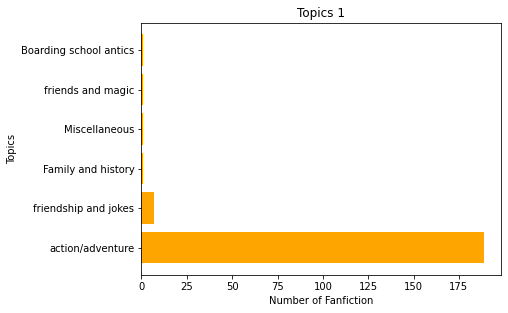

In [ ]:
values = ['action/adventure', 'friendship and jokes', 'Family and history', 'Miscellaneous','friends and magic','Boarding school antics']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values,hp_df[["Most probable topic"]].value_counts(), color="orange")
plt.title("Topics 1")
plt.ylabel("Topics")
plt.xlabel("Number of Fanfiction")
plt.show()
# Y axis is the topics which I'm still labelling, X axis is the total number of fanfiction
# Topic 7 = Boarding school antics
# Topic 5 = friends and magic
# Topic 18 = Miscellaneous
# Topic 0 = Family and history
# Topic 3 = friendship and jokes
# Topic 11 = action/adventure

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


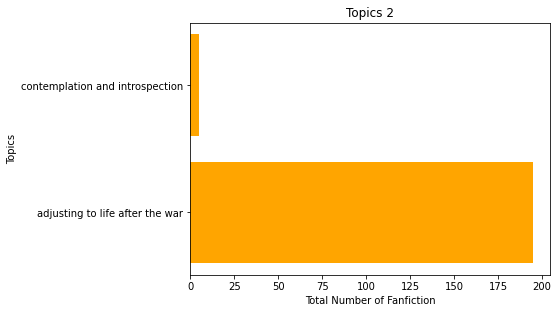

In [ ]:
values = ['adjusting to life after the war', 'contemplation and introspection']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values,indian_df[["Most probable topic"]].value_counts(),  color="orange")
plt.title("Topics 2")
plt.ylabel("Topics")
plt.xlabel("Total Number of Fanfiction")
plt.show()


# Y axis is the topics which I'm still labelling, X axis is the total number of fanfiction
# Topic 3 = contemplation and introspection
# Topic 11 = adjusting to life after the war

## Location tags

In [ ]:
gc = geonamescache.GeonamesCache()
cities = gc.get_cities()
south_asian_CC = ["BD", "BT", "PK", "IN", "LK", "NP", "AF", "MV"]

print(cities["3041563"])

{'geonameid': 3041563, 'name': 'Andorra la Vella', 'latitude': 42.50779, 'longitude': 1.52109, 'countrycode': 'AD', 'population': 20430, 'timezone': 'Europe/Andorra', 'admin1code': '07', 'alternatenames': ['ALV', 'Ando-la-Vyey', 'Andora', 'Andora la Vela', 'Andora la Velja', "Andora lja Vehl'ja", 'Andoro Malnova', 'Andorra', 'Andorra Tuan', 'Andorra a Vella', 'Andorra la Biella', 'Andorra la Vella', 'Andorra la Vielha', 'Andorra-a-Velha', "Andorra-la-Vel'ja", 'Andorra-la-Vielye', 'Andorre-la-Vieille', 'Andò-la-Vyèy', 'Andòrra la Vièlha', 'an dao er cheng', 'andolalabeya', 'andwra la fyla', 'Ανδόρρα', 'Андора ла Веля', 'Андора ла Веља', 'Андора ля Вэлья', 'Андорра-ла-Велья', 'אנדורה לה וולה', 'أندورا لا فيلا', 'አንዶራ ላ ቬላ', 'アンドラ・ラ・ヴェリャ', '安道爾城', '안도라라베야']}


In [ ]:
hp_df.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Most probable topic
0,21587791,Harry Potter,['hagridsboots'],Explicit,Other,Original Work,NaN,NaN,NaN,English,...,0.001437,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,6.495874e-04,4.664179e-07,Topic 11
1,30527505,Harry Potter,['White_Stone'],Mature,Multi,Harry Potter - J. K. Rowling,"Harry Potter/Tom Riddle | Voldemort, Hermione ...","Harry Potter, Tom Riddle | Voldemort, Hermione...","Master/Slave, Slave Tom Riddle, Master Harry P...",English,...,0.002499,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,Topic 11
2,7541962,Harry Potter,['moderatemalfoy (jenism)'],Teen And Up Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Original Female Character(s), Dra...","Harry Potter, Draco Malfoy, Seamus Finnigan, D...","Rape/Non-con Elements, Implied/Referenced Rape...",English,...,0.002499,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,Topic 11
3,24609490,Harry Potter,['rubymarella302'],Teen And Up Audiences,"Gen, M/M",Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Various Characters...",NaN,English,...,0.002498,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,Topic 11
4,13871511,Harry Potter meets Harry Potter,['CaelynAilene'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Draco Malfoy, Ron Weasley, Hermi...",NaN,English,...,0.002446,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,Topic 11


In [ ]:
ignore = ["Ron", "Granger", "Dudley", "Daphne"]
cities_all =[]
sa_all = 0
total_cities_all = 0
for index,row in hp_df.iterrows():
  body = row["body"].split()
  for k in cities.keys():
    if (cities[k]["name"].lower() in body) and (cities[k]["name"] not in ignore):
      total_cities_all+=1
      if ( cities[k]["countrycode"] != "GB" and cities[k]["name"]!= "London"):
        sa_all+=1
        cities_all.append((cities[k]["name"], cities[k]["countrycode"]))

In [ ]:
sa_all

1860

In [ ]:
sa_all/total_cities_all

0.8458390177353342

In [ ]:
cities_all

[('Rogers', 'US'),
 ('Evans', 'US'),
 ('Griffin', 'US'),
 ('Phoenix', 'US'),
 ('Evans', 'US'),
 ('Orange', 'AU'),
 ('Manage', 'BE'),
 ('Orange', 'FR'),
 ('Nice', 'FR'),
 ('Orange', 'US'),
 ('Normal', 'US'),
 ('Reading', 'US'),
 ('Orange', 'US'),
 ('Green', 'US'),
 ('Reading', 'US'),
 ('Surprise', 'US'),
 ('Orange', 'US'),
 ('Sake', 'CD'),
 ('Bra', 'IT'),
 ('Bay', 'PH'),
 ('Marks', 'RU'),
 ('Normal', 'US'),
 ('Reading', 'US'),
 ('Flint', 'US'),
 ('Green', 'US'),
 ('Reading', 'US'),
 ('Mission', 'CA'),
 ('Nice', 'FR'),
 ('Buy', 'RU'),
 ('Jupiter', 'US'),
 ('Mission', 'US'),
 ('Opportunity', 'US'),
 ('Peer', 'BE'),
 ('Manage', 'BE'),
 ('Nice', 'FR'),
 ('Sale', 'MA'),
 ('Buy', 'RU'),
 ('Normal', 'US'),
 ('Reading', 'US'),
 ('Green', 'US'),
 ('Reading', 'US'),
 ('Superior', 'US'),
 ('Surprise', 'US'),
 ('Opportunity', 'US'),
 ('Nice', 'FR'),
 ('Split', 'HR'),
 ('Pout', 'SN'),
 ('Goes', 'NL'),
 ('Manage', 'BE'),
 ('Goes', 'NL'),
 ('Buy', 'RU'),
 ('Green', 'US'),
 ('Green', 'US'),
 ('Surprise

In [ ]:
hp_df.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Most probable topic
0,21587791,Harry Potter,['hagridsboots'],Explicit,Other,Original Work,NaN,NaN,NaN,English,...,0.001437,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,4.664179e-07,6.495874e-04,4.664179e-07,Topic 11
1,30527505,Harry Potter,['White_Stone'],Mature,Multi,Harry Potter - J. K. Rowling,"Harry Potter/Tom Riddle | Voldemort, Hermione ...","Harry Potter, Tom Riddle | Voldemort, Hermione...","Master/Slave, Slave Tom Riddle, Master Harry P...",English,...,0.002499,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,7.645260e-08,Topic 11
2,7541962,Harry Potter,['moderatemalfoy (jenism)'],Teen And Up Audiences,"F/M, M/M",Harry Potter - J. K. Rowling,"Draco Malfoy/Original Female Character(s), Dra...","Harry Potter, Draco Malfoy, Seamus Finnigan, D...","Rape/Non-con Elements, Implied/Referenced Rape...",English,...,0.002499,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,3.257753e-08,Topic 11
3,24609490,Harry Potter,['rubymarella302'],Teen And Up Audiences,"Gen, M/M",Harry Potter - J. K. Rowling,Draco Malfoy/Harry Potter,"Harry Potter, Draco Malfoy, Various Characters...",NaN,English,...,0.002498,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,9.811617e-08,Topic 11
4,13871511,Harry Potter meets Harry Potter,['CaelynAilene'],General Audiences,NaN,Harry Potter - J. K. Rowling,NaN,"Harry Potter, Draco Malfoy, Ron Weasley, Hermi...",NaN,English,...,0.002446,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,5.955217e-08,Topic 11


cities_in =[]
sa_in = 0
total_cities_in = 0
for index,row in indian_df.iterrows():
  body = row["body"].split()
  for k in cities.keys():
    if (cities[k]["name"].lower() in body) and (cities[k]["name"] not in ignore):
      total_cities_in+=1
      if (  cities[k]["countrycode"] != "GB" and cities[k]["name"]!= "London"):
        sa_in+=1
        cities_in.append((cities[k]["name"], cities[k]["countrycode"]))

In [ ]:
sa_in

NameError: ignored

In [ ]:
cities_in

NameError: ignored

In [ ]:
sa_in/total_cities_in

In [ ]:
pd.DataFrame(cities_in)[1].value_counts().plot(kind="barh")

In [ ]:
pd.DataFrame(cities_all)[1].value_counts().plot(kind="barh")

###Slurs Word2Vec

In [ ]:
indian_df["body"].head()

0    \r\nThese days I see a theory or, rather, a he...
1    \r\nThe house was full with a delicious smell ...
2    Harry was holding his wand steady ready to def...
3    \r\nWhen a little muggleborn girl walks up to ...
4    The stairs stand between James and Lily like a...
Name: body, dtype: object

In [ ]:
import gensim
hp_words = []
for index, row in hp_df.iterrows():
  body = row["body"].replace("dirty blood", "dirtyblood")
  body = body.replace("blood traitor", "bloodtraitor")
  body = body.replace("sand nigger", "sandnigger")
  hp_words.append(body.split(" "))

model_hp  = gensim.models.Word2Vec(hp_words, window=5, min_count=1, sg=0, alpha=0.025, batch_words=10000)

for slur in slurs:
  try:
    print(slur, model_hp.wv.most_similar(positive=[slur], topn=10))
  except Exception as e:
    print(e)
    print(slur, " not found")

mudblood [('officially', 0.9736583828926086), ('crime', 0.9711796045303345), ('protection', 0.9661134481430054), ("We're", 0.9660746455192566), ('extreme', 0.9646545648574829), ('Like', 0.9644854068756104), ('luna', 0.9642566442489624), ('rapid', 0.9620943665504456), ('Imperius', 0.9620188474655151), ('unexpected', 0.9616477489471436)]
dirtyblood [('unknown,', 0.8302499651908875), ('doing."', 0.8268100023269653), ('cock...', 0.8255412578582764), ('chances', 0.7938647866249084), ('slay', 0.7899460792541504), ('assignment."', 0.7896760702133179), ('tomorrow."\r\n\r\n"He', 0.7893529534339905), ('wealth,', 0.7869604825973511), ('confidante,', 0.7867360711097717), ('late."\r\n\r\n"Are', 0.7853525280952454)]
bloodtraitor [("'Oh", 0.9349255561828613), ('subject?', 0.9328608512878418), ('Christmas,', 0.9315676689147949), ('alright', 0.9255494475364685), ('idiots.', 0.9240803122520447), ('"don\'t', 0.9235198497772217), ('Dumbles', 0.9231586456298828), ('End', 0.9230406284332275), ('surely', 0.9

In [ ]:
indian_words = []
for index, row in indian_df.iterrows():
  body = row["body"].replace("dirty blood", "dirtyblood")
  body = body.replace("blood traitor", "bloodtraitor")
  body = body.replace("sand nigger", "sandnigger")
  indian_words.append(body.split(" "))

model_indian = gensim.models.Word2Vec(indian_words, sg=0, alpha=0.025, min_count=1,  batch_words=10000)

# for slur in slurs:
#   try:
#     print(slur, model_indian.wv.most_similar(positive=[slur], topn=10))
#   except Exception as e:
#     print(e)

slurs_indian = slurs
print(slurs_indian)
for slur in slurs_indian:
  try:
    print(slur, model_indian.wv.most_similar(positive=[slur], topn=10))
  except Exception as e:
    slurs_indian = list(filter(lambda s: s != slur, slurs_indian))
vectors_indian = []
for slur in slurs_indian:
  try:
    vectors_indian.append(model_indian.wv[slur])
  except Exception as e:
    print(e)

['mudblood', 'dirtyblood', 'bloodtraitor', 'half-breed', 'mutant', 'squib', 'chee-chee', 'chi-chi', 'ciapaty', 'ciapak', 'coolie', 'curry-muncher', 'curries', 'dink', 'gook', 'gook-eye', 'gooky', 'hajji', 'hadji', 'haji', 'niakoué', 'paki', 'pakkis', 'pancakeface', 'sidewaysvagina', 'pussy', 'slopehead', 'slopey', 'sloper', 'touchofthetarbrush', 'yellowface', 'towelhead', 'tikkamasala', 'cabdriver', 'higger', 'hindunigger', 'appu', 'immigrant', 'terrorist', 'aliens', 'freak', 'sandnigger\n']
mudblood [('continued.', 0.9310208559036255), ('witch.', 0.9268209934234619), ('\r\n\r\n\r\n"It\'s', 0.9264346361160278), ('Is', 0.9264176487922668), ('story.', 0.9225724339485168), ('respects', 0.9217055439949036), ('blood,', 0.9180931448936462), ('slaves,', 0.9174751043319702), ('eh?"', 0.9164018630981445), ("There's", 0.9163511991500854)]
dirtyblood [('she?', 0.8033062219619751), ('dethrone', 0.7805430889129639), ('share,', 0.7780900001525879), ('mister', 0.7743608951568604), ('think.', 0.773909

In [ ]:
from sklearn.metrics import pairwise
# dist_matrix = pairwise.pairwise_distances(vectors_indian, metric='cosine')

from sklearn.manifold import MDS
from scipy.spatial.distance import squareform, pdist
dist_matrix = squareform(pdist(vectors_indian, "euclidean"))
mds_indian = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds_indian.fit_transform(dist_matrix)

import matplotlib.pyplot as plt


Text(0.5, 0, '')

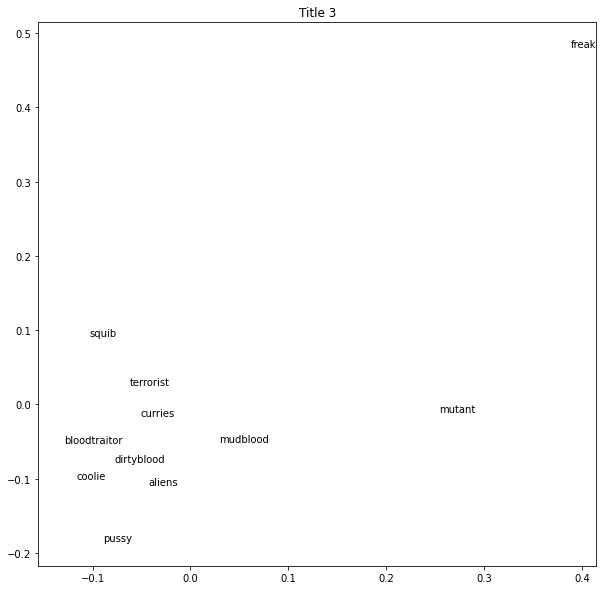

In [ ]:
_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors_indian)):
    ax.annotate(slurs_indian[i], ((embeddings[i,0], embeddings[i,1])))

plt.title("Title 3")
plt.xlabel("")

In [ ]:
dist_matrix.shape

(11, 11)

In [ ]:
hp_slurs = []
for index, row in hp_df.iterrows():
  body = row["body"].replace("dirty blood", "dirtyblood")
  body = body.replace("blood traitor", "bloodtraitor")
  body = body.replace("pancake face", "pancakeface")
  body = body.replace("cab driver", "cabdriver")
  body = body.replace("towel head", "towelhead")
  body = body.replace("sand nigger", "sandnigger")
  body = body.replace("yellow face", "yellowface")
  body = body.replace("tikka masala", "tikkamasala")
  body = body.replace("hindu nigger", "hindunigger")
  for word in body.split():
    if word in slurs:
      hp_slurs.append(word)

hp_slurs

['dirtyblood',
 'freak',
 'mudblood',
 'freak',
 'freak',
 'freak',
 'freak',
 'mudblood',
 'mudblood',
 'mudblood',
 'freak',
 'aliens',
 'aliens',
 'aliens',
 'mudblood',
 'mudblood',
 'mudblood',
 'mudblood',
 'mudblood',
 'freak',
 'freak',
 'squib',
 'squib',
 'freak',
 'freak',
 'freak',
 'freak',
 'freak',
 'freak',
 'freak',
 'squib',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'freak',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'freak',
 'freak',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'squib',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pussy',
 'pus

In [ ]:
indian_slurs = []
for index, row in indian_df.iterrows():
  body = row["body"].replace("dirty blood", "dirtyblood")
  body = body.replace("blood traitor", "bloodtraitor")
  body = body.replace("pancake face", "pancakeface")
  body = body.replace("cab driver", "cabdriver")
  body = body.replace("towel head", "towelhead")
  body = body.replace("sand nigger", "sandnigger")
  body = body.replace("yellow face", "yellowface")
  body = body.replace("tikka masala", "tikkamasala")
  body = body.replace("hindu nigger", "hindunigger")
  for word in body.split():
    if word in slurs:
      indian_slurs.append(word)

indian_slurs

['mudblood',
 'terrorist',
 'freak',
 'curries',
 'freak',
 'squib',
 'bloodtraitor',
 'freak',
 'freak',
 'freak',
 'freak',
 'freak',
 'terrorist',
 'terrorist',
 'freak',
 'coolie',
 'freak',
 'bloodtraitor',
 'squib',
 'freak',
 'freak',
 'freak',
 'mudblood',
 'bloodtraitor',
 'freak',
 'freak',
 'freak',
 'mutant',
 'mutant',
 'mutant',
 'mutant',
 'freak',
 'freak',
 'freak',
 'freak',
 'freak',
 'freak',
 'mutant',
 'mudblood',
 'squib',
 'aliens',
 'mudblood',
 'squib',
 'mudblood',
 'freak',
 'freak',
 'freak',
 'dirtyblood',
 'terrorist',
 'freak',
 'freak',
 'squib',
 'squib',
 'squib',
 'squib',
 'squib',
 'freak',
 'freak',
 'freak',
 'mudblood',
 'squib',
 'bloodtraitor',
 'pussy',
 'freak',
 'freak']

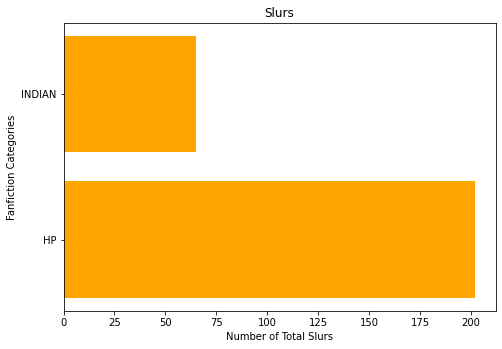

In [ ]:
values = ["HP", "INDIAN"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values,[len(hp_slurs), len(indian_slurs)], color="orange")
plt.title("Slurs")
plt.ylabel("Fanfiction Categories")
plt.xlabel("Number of Total Slurs")
plt.show()





# Y axis are the two categories of fanfics i.e Harry Potter fanfics and Indian Harry Potter fanfics
# X axis is the number of total slurs
# Please label Y axis Fanfiction Categories and X axis Number of Total Slurs